<a href="https://colab.research.google.com/github/sanajajoseph/Machine-Learning-Projects/blob/main/ML_Wine_Quality_Prediction_Final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Quality Prediction

**IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#!pip install lightgbm
from lightgbm import LGBMClassifier





In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#see model parametres
from sklearn import set_config
#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

# Assuming you want to use the colored function from termcolor
from termcolor import colored
print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [ ]:
#Reading Dataset
wine = pd.read_csv("/content/winequality.csv")
df = wine.copy()
df.head(n = 10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# checking for missing values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


**Descriptive Statistics of Numeric Variables**

Data Analysis and Visualization

In [ ]:
df.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Rename Column Names**

In [ ]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Exploratory Data Analysis and Visualization**

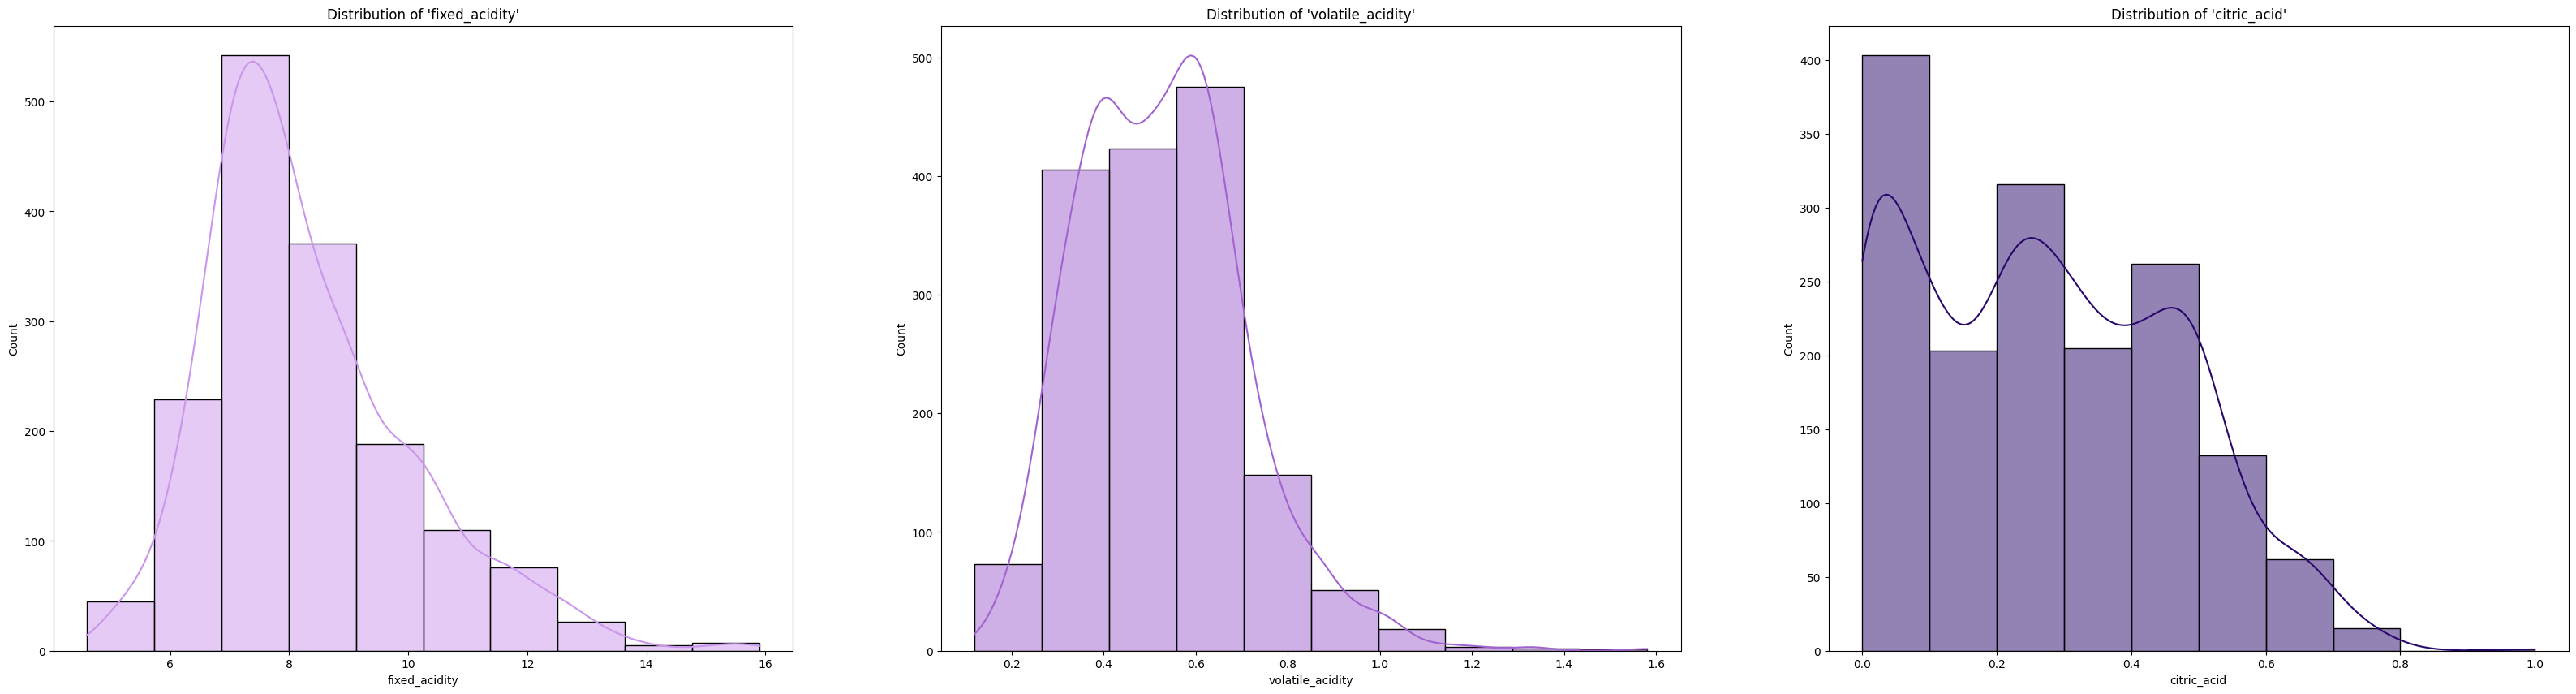

In [ ]:
#Histplot

fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

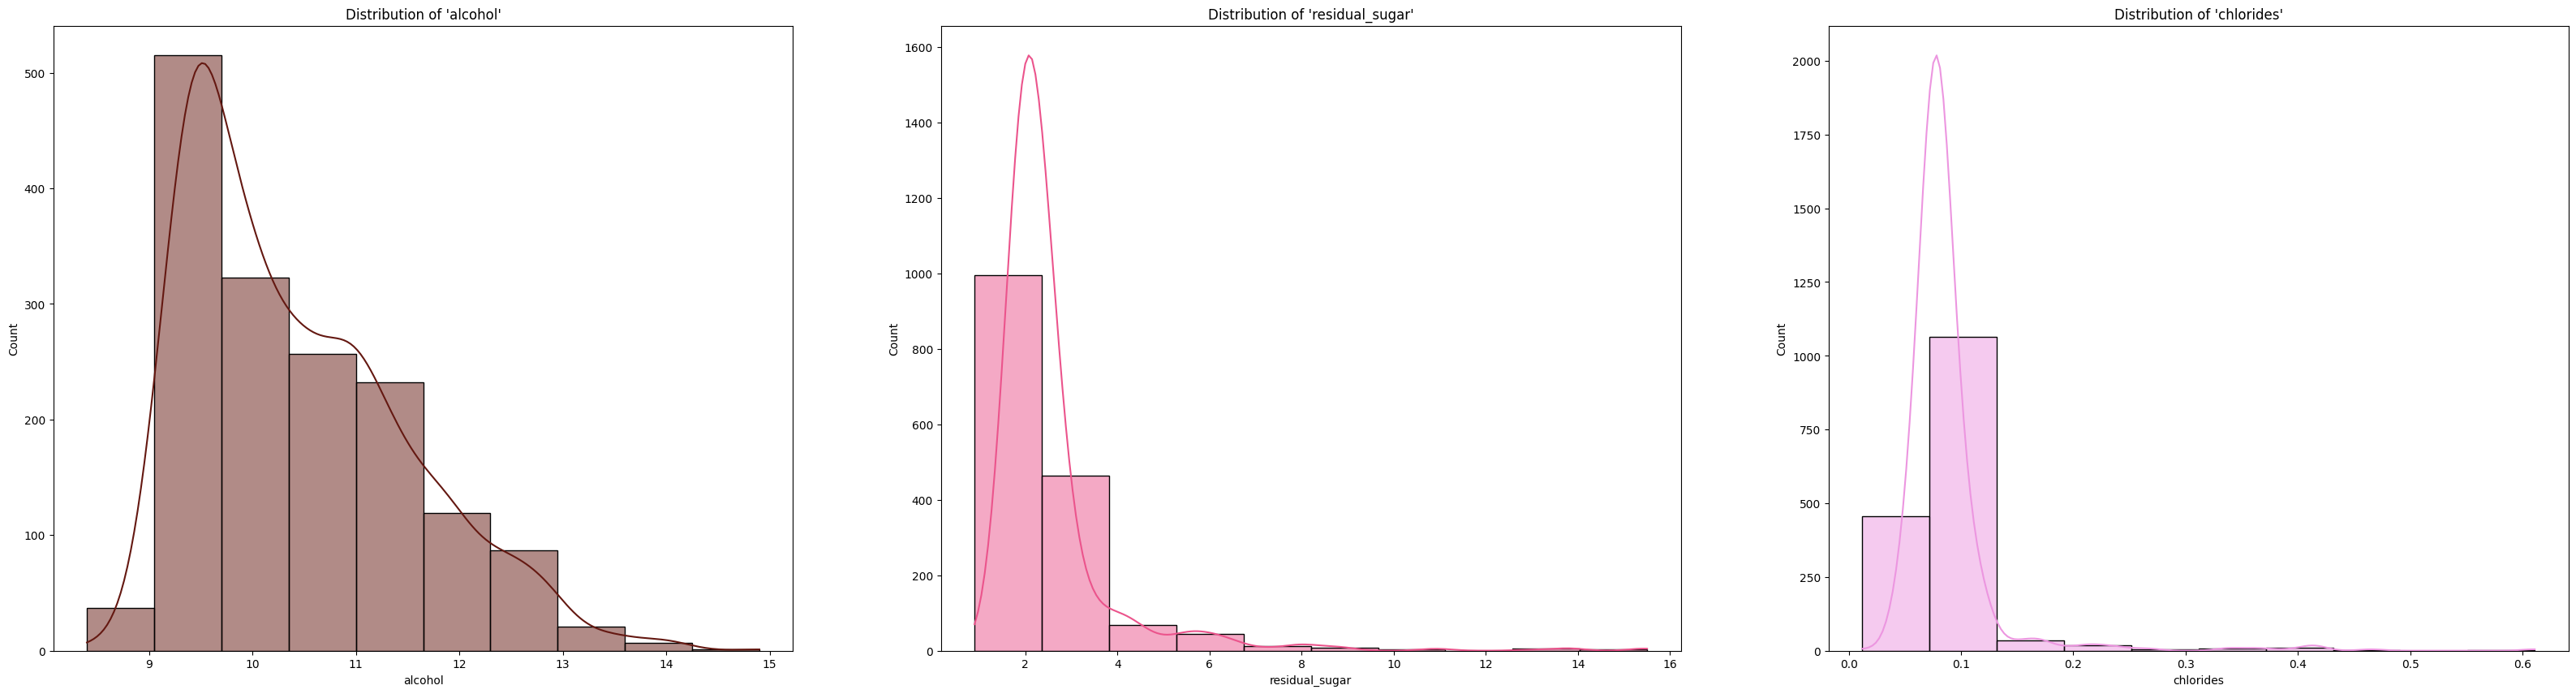

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual_sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

Distribution
Analyzing the graphs here, it turns out that the distributions of these variables are not normal

Pairplot

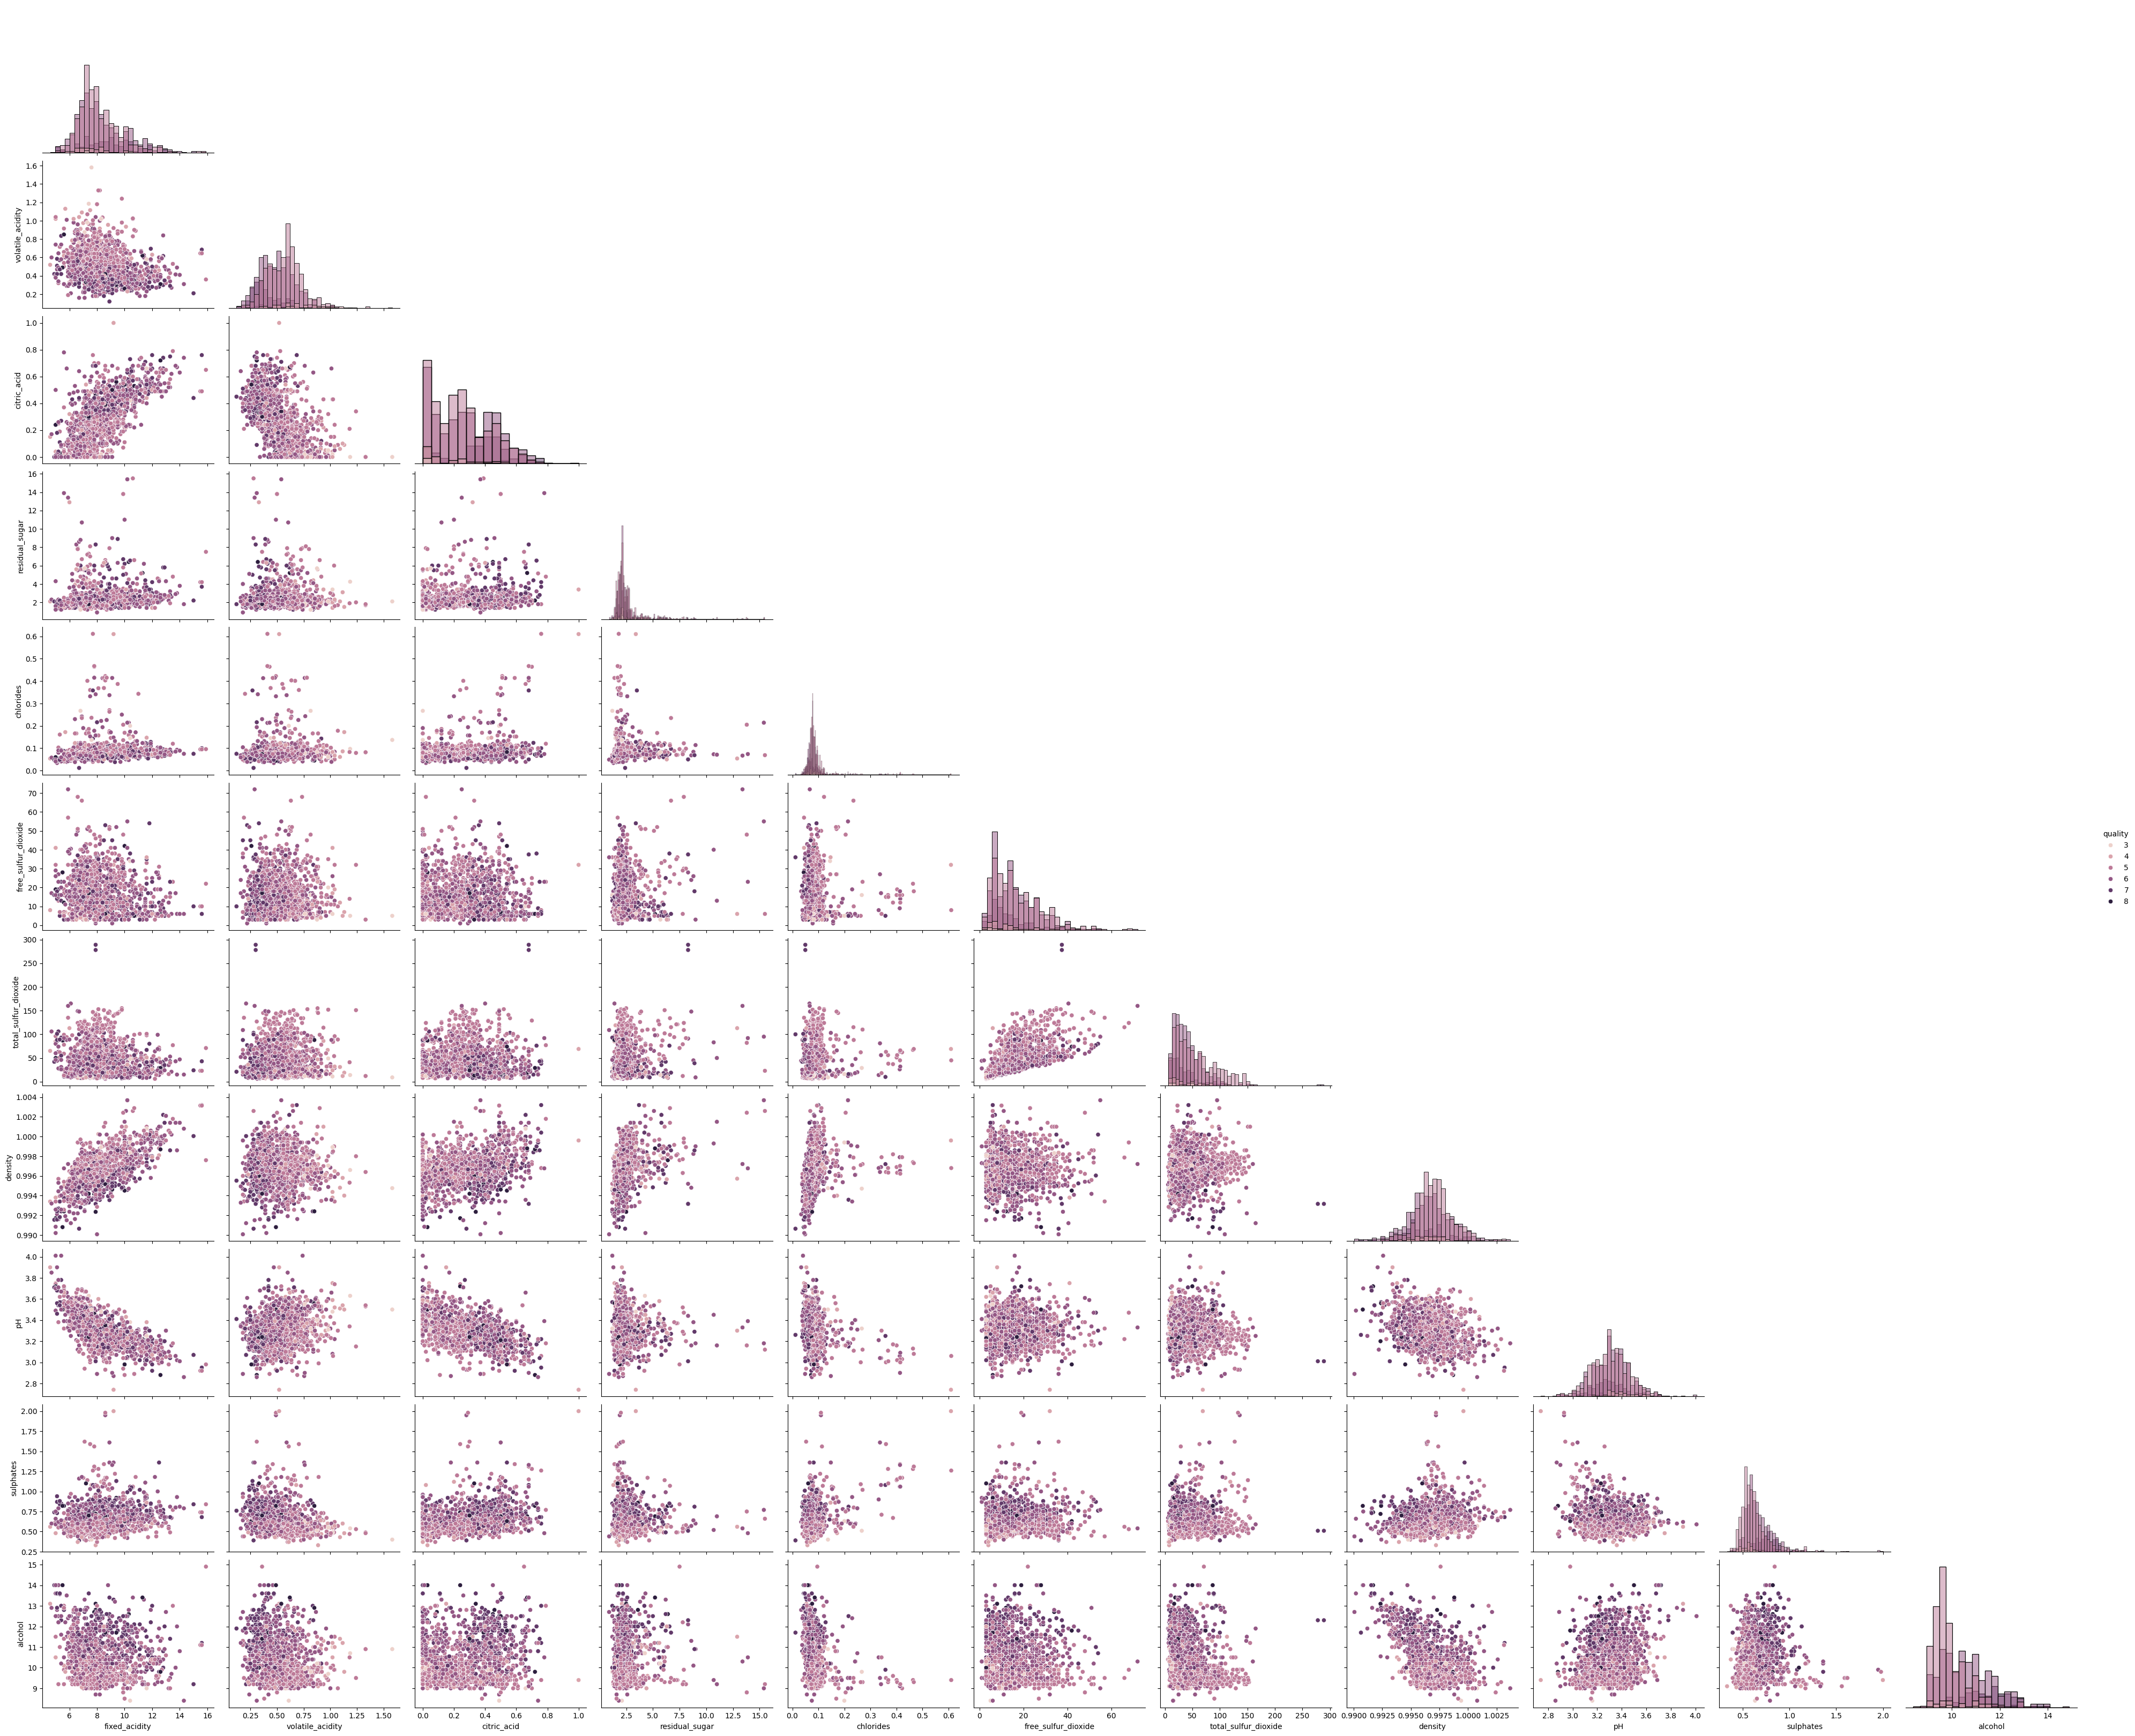

In [ ]:
#Pairplot
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);

Multicollinearity detected !
We see here that there is correlation between some variables. And this is what we don't want. This problem is called 'multicollinearity'

Scatterplot

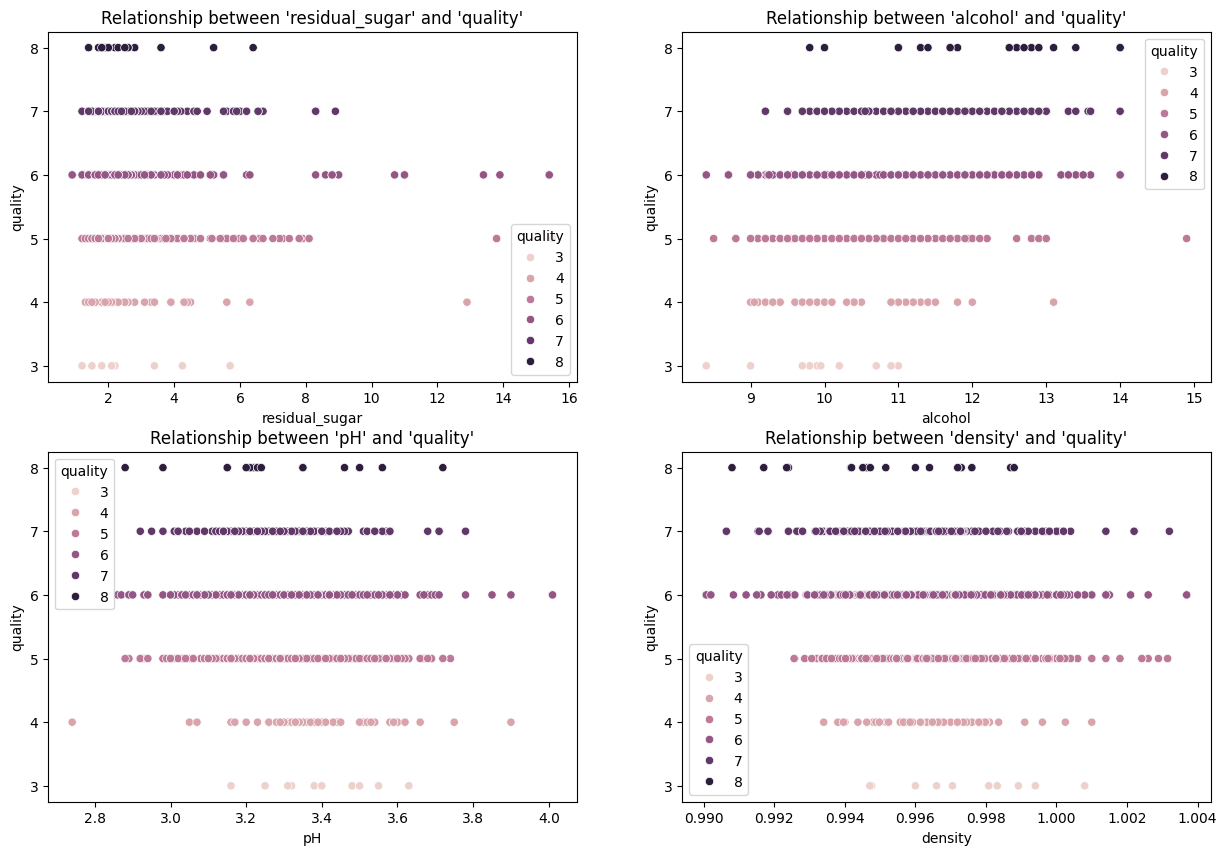

In [ ]:
#Scatterplot

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

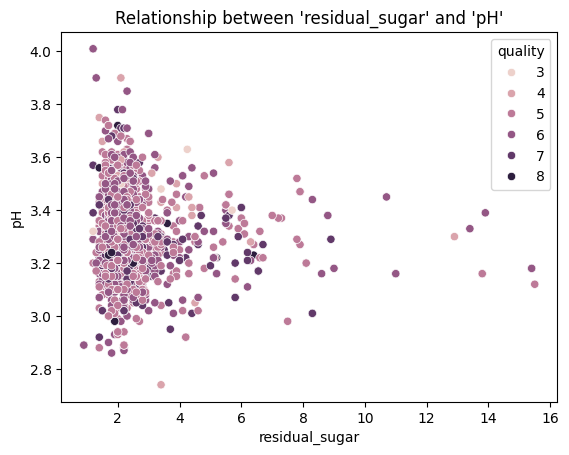

In [ ]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

As it can be seen there is not correlation between 'residual_sugar' and 'pH' variables

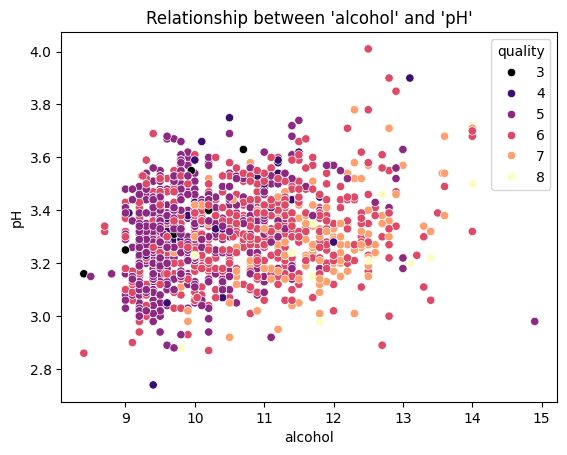

In [ ]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

As it can be seen there is not correlation between 'alcohol' and 'pH' variables

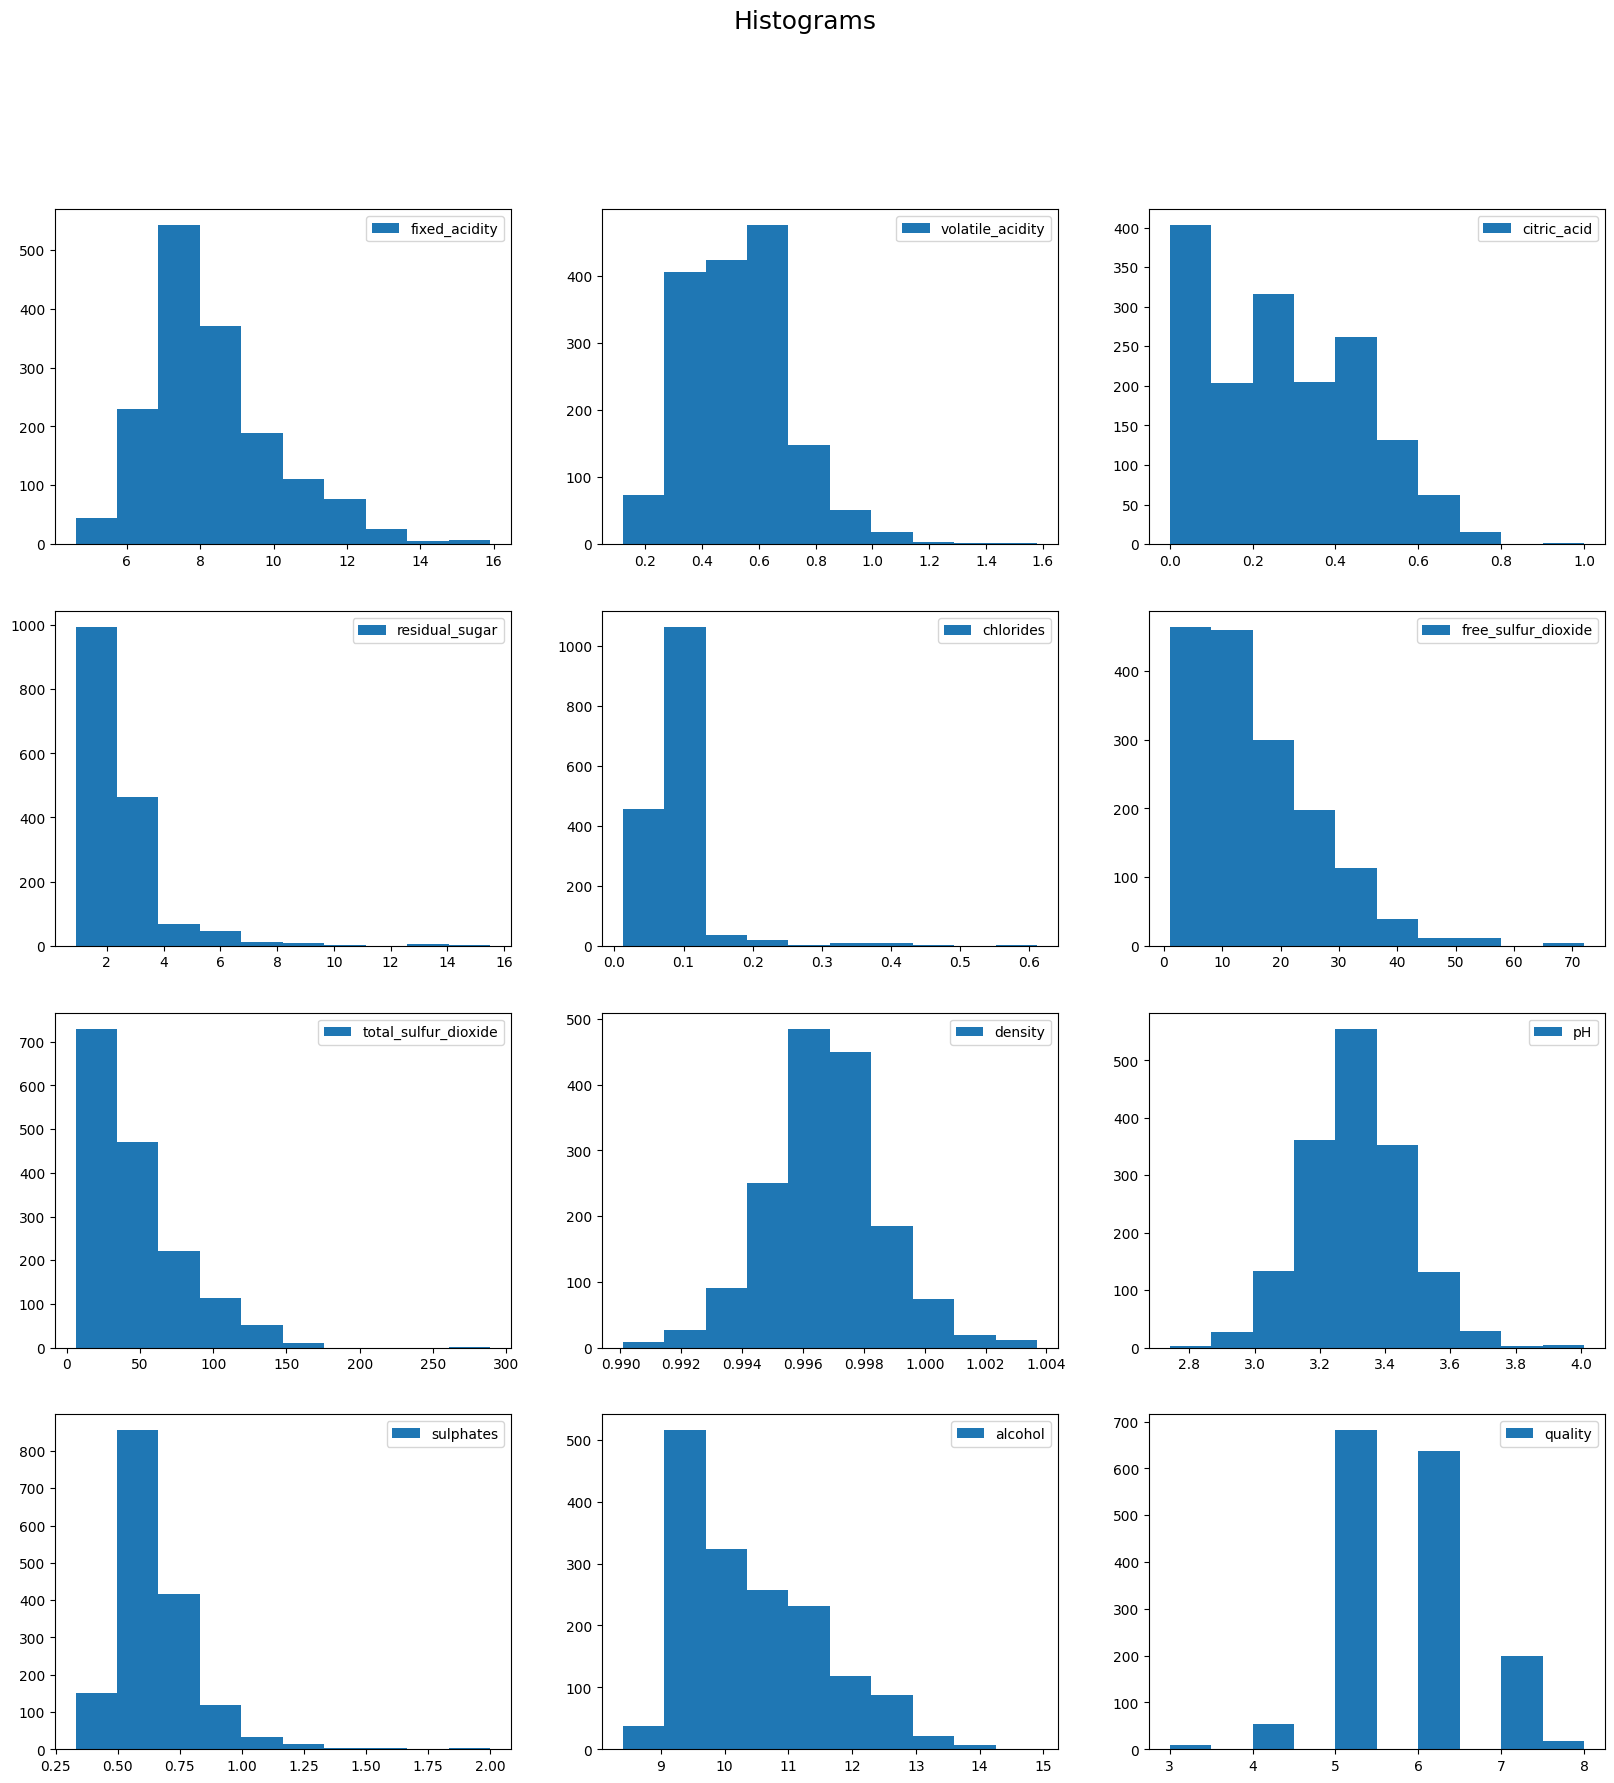

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

#colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
 #         '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
  #        '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

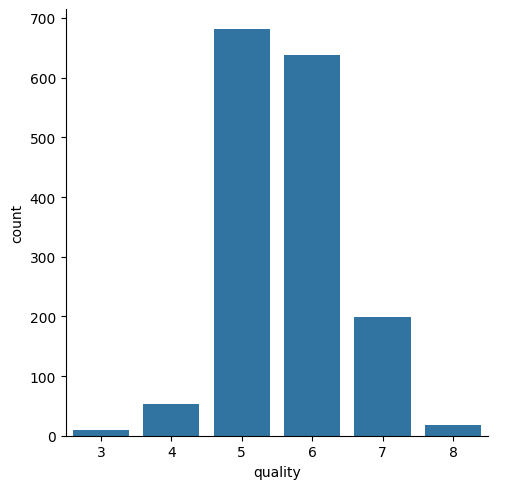

In [ ]:
# number of values for each quality
sns.catplot(x = "quality", data = wine, kind = "count")

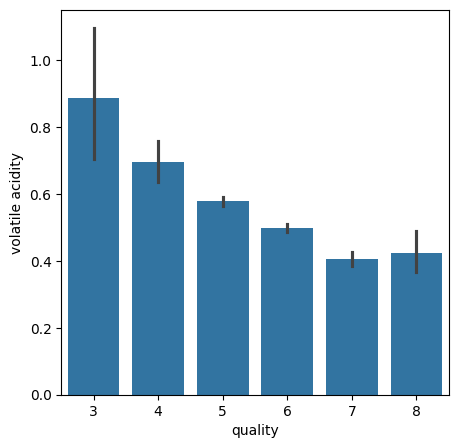

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "volatile acidity", data = wine)
plt.show()

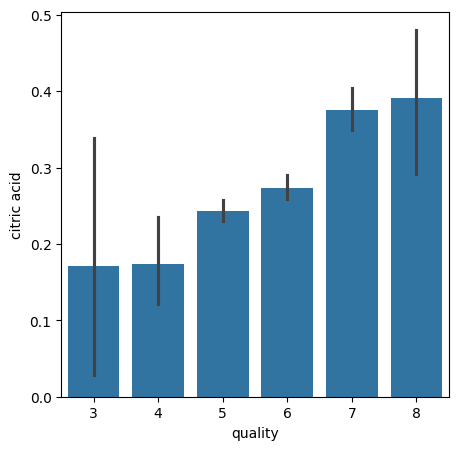

In [ ]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "citric acid", data = wine)
plt.show()

**Heatmap and Correlation**

In [ ]:
# correlation
correlation = wine.corr()
print(correlation["quality"].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


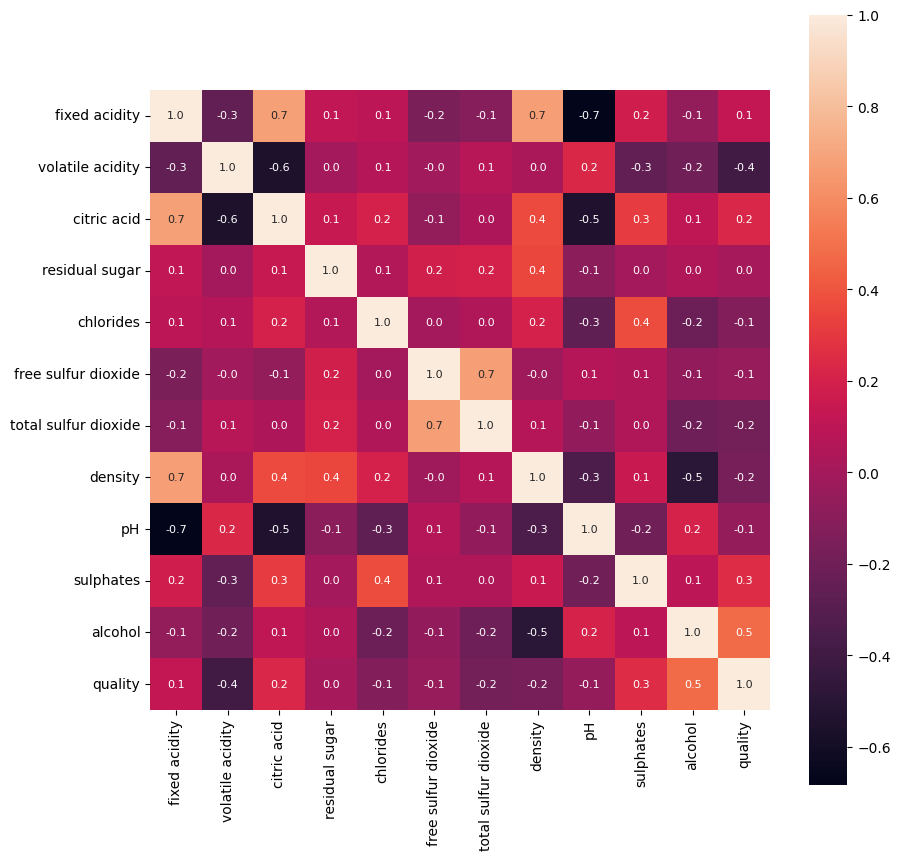

In [ ]:
# heatmap for correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 8})
plt.show()

Correlation
Here we see that there is relatively high (0.67, positive) correlation between 'free sulfur dioxide' and 'total_sulfur_dioxide' variables. There is relatively high (-0.68, negative) correlation between "pH" and "fixed_acidity" variables. And there is about 0.5 correlation between some of other variables. That's why we must consider when build Machine Learning models.


In [ ]:
list = (df[["alcohol","density"]].corr(), df[["fixed_acidity","pH"]].corr(),
        df[["citric_acid","pH"]].corr(), df[["fixed_acidity","density"]].corr(),
        df[["free_sulfur_dioxide","total_sulfur_dioxide"]].corr())
for corr in list:
    print(corr, "\n\n")

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 


               fixed_acidity        pH
fixed_acidity       1.000000 -0.682978
pH                 -0.682978  1.000000 


             citric_acid        pH
citric_acid     1.000000 -0.541904
pH             -0.541904  1.000000 


               fixed_acidity   density
fixed_acidity       1.000000  0.668047
density             0.668047  1.000000 


                      free_sulfur_dioxide  total_sulfur_dioxide
free_sulfur_dioxide              1.000000              0.667666
total_sulfur_dioxide             0.667666              1.000000 




In the code blocks below we will look at the Pearson correlation coefficient between some variables

In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.4961797702417017), pvalue=np.float64(3.938835339988381e-100))


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["free_sulfur_dioxide"],
                                                      df["total_sulfur_dioxide"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6676664504810216), pvalue=np.float64(6.404722954681827e-207))


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.6829781945685313), pvalue=np.float64(4.06303403984401e-220))


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["citric_acid"],
                                                      df["pH"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(-0.5419041447395097), pvalue=np.float64(1.0072013259114716e-122))


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["fixed_acidity"],
                                                      df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=np.float64(0.6680472921189737), pvalue=np.float64(3.0747470608597493e-207))


**DATASET PREPROCESSING**

In [ ]:
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

**In this dataset quality range is between 3 and 8**

**We will divide quality range into two parts**

- High quality wine: 6 - 8
- Low quality wine: 3 - 5

In [ ]:
#Starting partioning data
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

**Select Dependent and Independent Variables**

In [ ]:
#separate data and label
# we select independent variable
X = df.drop("quality", axis = 1)
print(X.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [ ]:
# we select dependent variable (label)
# label binarization or label encoding
Y = wine["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Split Dataset into Train and Test Sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,  stratify= Y, random_state = 2)

**Standardization**

In [ ]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [ ]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (1599, 11)
Train data:  (1279, 11)
Test data:  (320, 11)


In [ ]:
print(X_train)
print(Y_train)

[[0.23893805 0.38392857 0.01       ... 0.48031496 0.1497006  0.4       ]
 [0.2300885  0.43303571 0.02       ... 0.56692913 0.11976048 0.52307692]
 [0.18584071 0.26785714 0.27       ... 0.33070866 0.14371257 0.44615385]
 ...
 [0.24778761 0.59375    0.19       ... 0.33070866 0.11377246 0.18461538]
 [0.48672566 0.22321429 0.34       ... 0.33858268 0.19161677 0.33846154]
 [0.32743363 0.53125    0.15       ... 0.38582677 0.26347305 0.16923077]]
1031    1
1364    0
649     0
276     0
792     0
       ..
524     0
1024    1
1445    0
1035    1
141     0
Name: quality, Length: 1279, dtype: int64


**BUILDING CLASSIFICATION MODELS**


**Building Machine Learning Models**

                            **Model Training Using K-Nearest Neighbors(KNN) Model**

In [ ]:
knn = KNeighborsClassifier()

**Hyperparameter Tuning for KNN Model**

In [ ]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Get Best Parameters of KNN Model**

In [ ]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.8999138779527559
____________________________________________
best K value: 28 
best weights: distance 
best leaf size: 25


**Build KNN Model with Best Parameters**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=np.int64(28),
                     p=2, weights='distance')

**Accuracy Score of KNN Model on Test set**

In [ ]:
Y_pred = knn_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.93125

**Classification Report of KNN Model**

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.82      0.63      0.71        43

    accuracy                           0.93       320
   macro avg       0.88      0.80      0.84       320
weighted avg       0.93      0.93      0.93       320



                                **Gradient Boosting Machines (GBM) Model**

In [ ]:
gbm = GradientBoostingClassifier()

**Hyperparameter Tuning for GBM Model**

In [ ]:
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1)
gbm_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Get Best Parameters of GBM Model**

In [ ]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.9061700295275591
__________________________________________________________
best learning_rate value: 0.1 
best n_estimators value: 150 
best max_depth value: 4 
best min_samples_split value: 4


**|Build GBM Model with Best Parameters**

In [ ]:
bm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(X_train, Y_train)

**Accuracy Score of GBM Model on Test set**

In [ ]:
Y_pred = gbm_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9

**Classification Report of GBM Model**

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.67      0.51      0.58        43

    accuracy                           0.90       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.89      0.90      0.89       320



                                              **Light GBM Model**

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"n_estimators": [80, 100, 120, 150, 200],
              "max_depth": [-1, 3, 4],
              "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
              "min_child_samples": [15, 20, 25, 30]}

# Instantiate the LGBMClassifier
from lightgbm import LGBMClassifier # Make sure to import the class if not already done
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1)
lgbm_cv_model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 174, number of negative: 1105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136044 -> initscore=-1.848545
[LightGBM] [Info] Start training from score -1.848545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=None, num_leaves=31,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
                         'max_depth': [-1, 3, 4],
                         'min_child_samples': [15, 20, 25, 30],
                         'n_estimators': [80, 100, 120, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Get Best Parameters of Light GBM Model**

In [ ]:
# To get and show the best hyperparametres

print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("____________________________________________")

print("best learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.9085199311023622
____________________________________________
best learning_rate value: 0.15 
best n_estimators value: 100 
best max_depth value: 4 
best min_child_samples value: 20


**Build Light GBM Model with Best Parameters**

In [ ]:
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                      max_depth = lgbm_cv_model.best_params_["max_depth"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"])
lgbm_model = lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 174, number of negative: 1105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136044 -> initscore=-1.848545
[LightGBM] [Info] Start training from score -1.848545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

**Accuracy Score of Light GBM Model on Test set**


In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9

**Classification Report of Light GBM Model**

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.67      0.51      0.58        43

    accuracy                           0.90       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.89      0.90      0.89       320



**ROC AUC - Light GBM Model **

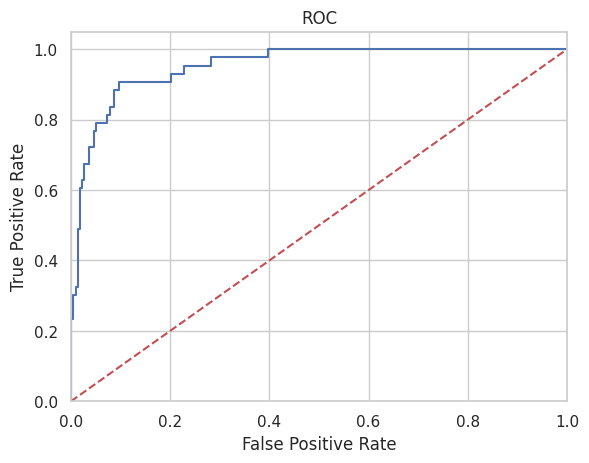

In [ ]:
lgbm_roc_auc = roc_auc_score(Y_test, lgbm_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(Y_test, lgbm_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**Model Training using Random Forest**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

**Model Evaluation**

In [ ]:
# accuracy score on the training data
X_train_prediciton = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  1.0


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.946875


In [ ]:
# Predictions on training data
X_train_prediction = model.predict(X_train)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_train, X_train_prediction)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1105    0]
 [   0  174]]


In [ ]:
# Precision Score
precision = precision_score(Y_train, X_train_prediction, average='binary')  # Use 'macro', 'micro', or 'weighted' for multi-class
print("Precision Score:", precision)

Precision Score: 1.0


In [ ]:
# Recall Score
recall = recall_score(Y_train, X_train_prediction, average='binary')
print("Recall Score:", recall)

Recall Score: 1.0


In [ ]:
# F1 Score
f1 = f1_score(Y_train, X_train_prediction, average='binary')
print("F1 Score:", f1)

F1 Score: 1.0


In [ ]:
# Full classification report
print("\nClassification Report:\n", classification_report(Y_train, X_train_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1105
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



**Predictive System**

In [ ]:
Y_test.iloc[311]     #255  -- 0, 311 -->1
print("Lenghth of test data set is:", len(Y_test))

Lenghth of test data set is: 320


In [ ]:
Y_test.info()

<class 'pandas.core.series.Series'>
Index: 320 entries, 1496 to 1300
Series name: quality
Non-Null Count  Dtype
--------------  -----
320 non-null    int64
dtypes: int64(1)
memory usage: 5.0 KB


In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df.iloc[311]

fixed_acidity           0.380531
volatile_acidity        0.205357
citric_acid             0.400000
residual_sugar          0.184932
chlorides               0.163606
free_sulfur_dioxide     0.154930
total_sulfur_dioxide    0.063604
density                 0.397944
pH                      0.385827
sulphates               0.221557
alcohol                 0.553846
Name: 311, dtype: float64

In [ ]:
sample = X_test[311]
print(sample)

[0.38053097 0.20535714 0.4        0.18493151 0.16360601 0.15492958
 0.06360424 0.3979442  0.38582677 0.22155689 0.55384615]


In [ ]:
input_data = (sample)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


In [ ]:
if(prediction[0] == 0):
    print("Poor Quality Wine.")
else:
    print("Good Quality Wine.")

Good Quality Wine.


**Model Training Using Decision Tree Classification**

In [ ]:
# Define the model
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Set up GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              random_state=42,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated Score: 0.8819332107843139


In [ ]:
# Predict using best estimator
best_model = grid_search.best_estimator_
Y_test_pred = best_model.predict(X_test)

In [ ]:
# Evaluate on test data
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Training Report:\n", classification_report(Y_train, Y_train_pred))

print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Report:\n", classification_report(Y_test, Y_test_pred))

Training Accuracy: 1.0
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1105
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

Test Accuracy: 0.890625
Test Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       277
           1       0.60      0.58      0.59        43

    accuracy                           0.89       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.89      0.89      0.89       320



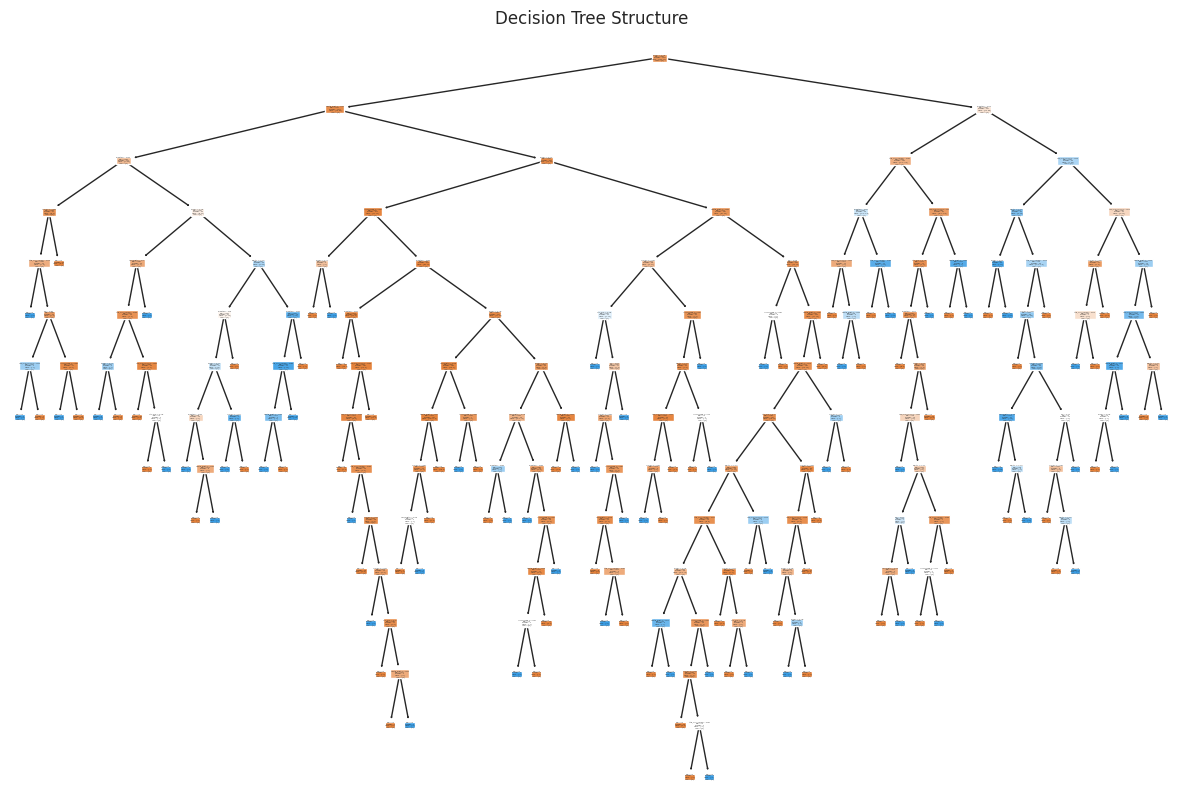

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Structure")
plt.show()


**Model Training Using Support Vector Machine (SVM)**

In [ ]:
#Initialize the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [ ]:
# Fit the model
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

svm_model = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
# Best model
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# Predict
Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

# Step 4: Evaluate
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))


Training Accuracy: 0.8639562157935887
Test Accuracy: 0.865625
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        43

    accuracy                           0.87       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.75      0.87      0.80       320

